# Thick Sample Ptychography Sample Tutorial 3D

Tutorial to show how to construct or load a sample space and visualise.

### 1. Import Libraries: Sample Space


In [1]:
from thick_ptycho.sample_space.sample_space import SampleSpace

### 2. Set Simulation Parameters

Choose boundary conditions, probe type, and define the spatial domain and discretization.

In [2]:
bc_type = "impedance"               # Boundary condition type 
probe_type = "disk"                 # Airy disk probe
wave_number = 1e4  # Wave number

# Continuous space limits (micrometers)
xlims = [0, 1000]                    # X limits in micrometers
ylims = [0, 1000]                    # Y limits in micrometers
zlims = [0, 20]

# Continuous space parameters
continuous_dimensions = [
    xlims, 
    ylims, 
    zlims
    ]                     # Continuous dimensions in micrometers

# Discrete space parameters
propagation_slices = 20              # Number of z slices
probe_dimensions = [32, 32]         # Detector shape can be different from discrete_dimensions
probe_diameter = 20                 # Diameter if using initial condition "disk"
scan_points = 3                     # Single probe
step_size = 10                     # Step size in pixels


# Discrete space limits (pixels)
min_nx = int(scan_points * step_size + probe_dimensions[0])
min_ny = int(scan_points * step_size + probe_dimensions[1])
print(f"Pixels for compatibility with Diamond thin-sample simulation:")
print(f"nx = {min_nx} and ny = {min_ny}")
print(f"(These are also the minimum values for the discrete space limits)")

nx, ny = 50, 50          # Number of pixels in x and y directions
if nx < min_nx:
    nx = min_nx
if ny < min_ny:
    ny = min_ny
discrete_dimensions = [
    nx, 
    ny, 
    propagation_slices
    ]   

Pixels for compatibility with Diamond thin-sample simulation:
nx = 62 and ny = 62
(These are also the minimum values for the discrete space limits)


### 3. Create Sample Space

Initialize the sample space. The sample space dimensions are defined here as well
as it's discritization in pixels. The subdimensions

2025-09-23 07:52:05,230 - INFO - Summary of the scan (continuous):
2025-09-23 07:52:05,231 - INFO -     Sample space x: 1000 m
2025-09-23 07:52:05,232 - INFO -     Sample space y: 1000 m
2025-09-23 07:52:05,232 - INFO -     Sample space z: 20 m
2025-09-23 07:52:05,233 - INFO -     Probe Diameter: 327.87 m
2025-09-23 07:52:05,234 - INFO -     Number of scan points: 9
2025-09-23 07:52:05,235 - INFO -     Max Overlap: 166.58 m 



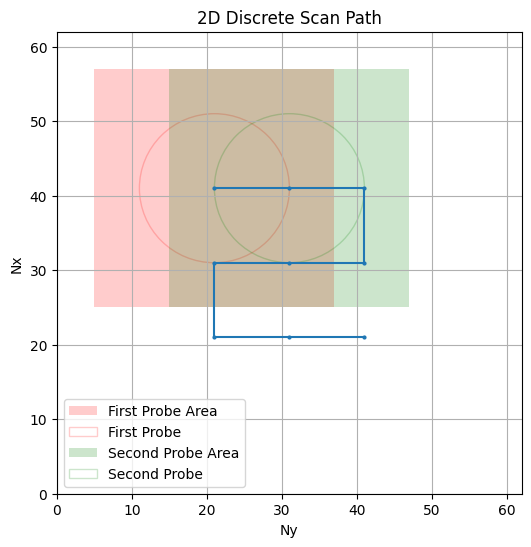

In [3]:
sample_space = SampleSpace(
    continuous_dimensions, # sample space dimensions in nanometers (x, z) or (x, y, z)
    discrete_dimensions,   # sample space dimensions in pixels (nx, nz) or (nx, ny, nz)
    probe_dimensions,        # shape of the detector in pixels - subset of (nx) or (nx, ny)
    scan_points,           # number of ptychography scan points or sqrt(scan_points) for square scan
    step_size,
    bc_type,               # boundary condition type (impedance, dirichlet, neumann)
    probe_type,
    wave_number,            # wavenumber in 1/nm
    probe_diameter=probe_diameter
)
sample_space.summarize_sample_space()

### 4. Add Objects and Visualize Sample Space

Add cubiods, prisms or cylinders with specified refractive indices to the sample space.

In [4]:
# Add objects to the sample space and generate it
# Refractive index: 1 + e-4 + e-6i
delta = 1e-4
beta = 1e-6j
refractive_index_pertubation1 = delta + beta
refractive_index_pertubation2 = 0.99*delta + beta
guassian_blur = 0.5 # removes sharp edges in the refractive index perturbation
sample_space.add_object('prism', refractive_index_pertubation1, side_length=0.3*xlims[1],
                         centre=(xlims[1]*0.65, xlims[1]*0.65, zlims[1]*0.5),
                         depth=zlims[1]*0.8,guassian_blur=guassian_blur)
sample_space.add_object('cuboid', refractive_index_pertubation2, side_length=0.2*xlims[1],
                        centre=(xlims[1]*0.4, xlims[1]*0.4, zlims[1]*0.5),
                        depth=zlims[1]*0.8,guassian_blur=guassian_blur)

sample_space.generate_sample_space()

In [5]:
# Import Visualisation module
from thick_ptycho.utils.visualisations import Visualisation

visualisation = Visualisation(sample_space=sample_space)

# Visualise the Sample Space
display(visualisation.build_slider_widget(solution=sample_space.n_true, view = "phase_amp"))

### 4. Load in and Visualize Sample Space

In [6]:
bc_type = "impedance"               # Boundary condition type 
probe_type = "disk"                 # Airy disk probe
wave_number = 1e4  # Wave number

# Continuous space limits (micrometers)
xlims = [0, 1000]                    # X limits in micrometers
ylims = [0, 1000]                    # Y limits in micrometers
zlims = [0, 20]

# Continuous space parameters
continuous_dimensions = [
    xlims, 
    ylims, 
    zlims
    ]                     # Continuous dimensions in micrometers

# Discrete space parameters
propagation_slices = 128              # Number of z slices
probe_dimensions = [32, 32]         # Detector shape can be different from discrete_dimensions
probe_diameter = 20                 # Diameter if using initial condition "disk"
scan_points = 24                     # Single probe
step_size = 4                     # Step size in pixels


# Discrete space limits (pixels)
min_nx = int(scan_points * step_size + probe_dimensions[0])
min_ny = int(scan_points * step_size + probe_dimensions[1])
print(f"Pixels for compatibility with Diamond thin-sample simulation:")
print(f"nx = {min_nx} and ny = {min_ny}")
print(f"(These are also the minimum values for the discrete space limits)")

nx, ny = 128, 128          # Number of pixels in x and y directions
if nx < min_nx:
    nx = min_nx
if ny < min_ny:
    ny = min_ny
discrete_dimensions = [
    nx, 
    ny, 
    propagation_slices
    ]   

Pixels for compatibility with Diamond thin-sample simulation:
nx = 128 and ny = 128
(These are also the minimum values for the discrete space limits)


2025-09-23 07:52:06,027 - INFO - Summary of the scan (continuous):
2025-09-23 07:52:06,028 - INFO -     Sample space x: 1000 m


2025-09-23 07:52:06,028 - INFO -     Sample space y: 1000 m
2025-09-23 07:52:06,029 - INFO -     Sample space z: 20 m
2025-09-23 07:52:06,029 - INFO -     Probe Diameter: 157.48 m
2025-09-23 07:52:06,030 - INFO -     Number of scan points: 576
2025-09-23 07:52:06,031 - INFO -     Max Overlap: 126.23 m 



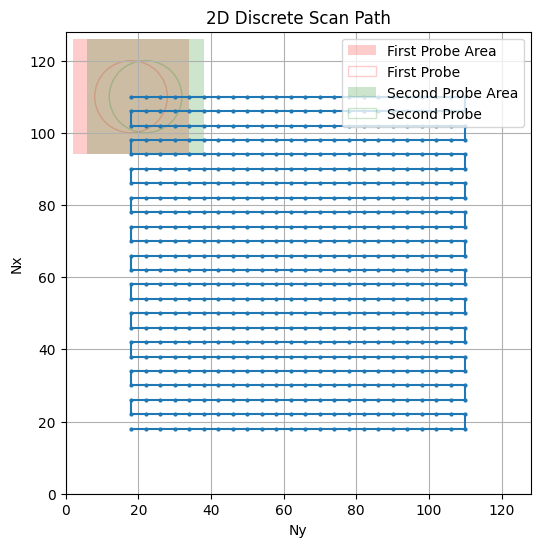

In [7]:
sample_space = SampleSpace(
    continuous_dimensions, # sample space dimensions in nanometers (x, z) or (x, y, z)
    discrete_dimensions,   # sample space dimensions in pixels (nx, nz) or (nx, ny, nz)
    probe_dimensions,        # shape of the detector in pixels - subset of (nx) or (nx, ny)
    scan_points,           # number of ptychography scan points or sqrt(scan_points) for square scan
    step_size,
    bc_type,               # boundary condition type (impedance, dirichlet, neumann)
    probe_type,
    wave_number,            # wavenumber in 1/nm
    probe_diameter=probe_diameter
)
sample_space.summarize_sample_space()

In [8]:
# Alternatively, load in your own sample space
filepath = "./data/simulated_spheres_128.npy"
sample_space.load_sample_space(filepath)

2025-09-23 07:52:06,192 - INFO - Loaded sample space shape: (128, 128, 128)


In [9]:
# Import Visualisation module
from thick_ptycho.utils.visualisations import Visualisation

visualisation = Visualisation(sample_space=sample_space)

# Visualise the Sample Space
visualisation.plot(solution=sample_space.n_true, slider=True, title=" (Sample Space Refractive Index)")

AttributeError: 'Visualisation' object has no attribute 'plot'